In [2]:
%matplotlib inline
import os

GIMME_DIR = "/home/isaac/gimmeSAD"
SIMOUT_DIR = os.path.join(GIMME_DIR, "new_sims/")

os.chdir(GIMME_DIR)
import implicit_BI
import gimmeSAD
import numpy as np
import matplotlib.pyplot as plt
import itertools


In [3]:
def load_pidxy(filename):
    with open(filename) as infile:
        dat = []
        for line in infile.readlines():
            dat.append(line.strip().split())
    dat = np.array(dat)
    return dat

In [15]:
from scipy.interpolate import spline

dat = load_pidxy("/home/isaac/gimmeSAD/1d_sims/K_3681-C_0.00251605641355_1503168927.64/sumstats.txt")
print(dat[2])
#times = np.array(map(float, dat[1:,3]))
shans = np.array(map(float, dat[1:,6]))
xnew = np.linspace(0, 1, 300)
#power_smooth = spline(times, shans, xnew)

plt.plot(times, shans)
plt.show()

['3681' '0.00251605641355' '10000' '0.011953273567' '0.0037' '0.0013'
 '1.40594042557' '17' '0' '3' '0' '1' '0' '0' '0' '0' '1']


NameError: name 'times' is not defined

[11, 12, 5, 2, 1, 0, 0, 0, 0, 2]
[  1.12405594e+01   4.88268065e+00  -6.95308858e+00   2.08082751e+00
  -2.46911422e-01   1.03846154e-02]


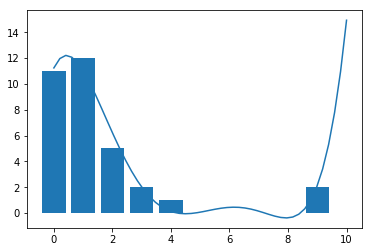

In [71]:
import numpy.polynomial.polynomial as poly
hist = [int(x) for x in dat[50][7:]]
print(hist)
plt.bar(np.arange(len(hist)), height=hist)
y = hist
x = xrange(len(hist))
x_new = np.linspace(0,10)
coefs = poly.polyfit(x, y, 5)
print(coefs)
ffit = poly.polyval(x_new, coefs)
plt.plot(x_new, ffit)
#plt.hist(hist)

## Get mean pi and dxy


In [72]:
infile = "/tmp/sims/K_3893-C_0.00775090300895_1503176756.18/gimmeSAD.out"
dat = open(infile).readlines()
print(dat)

["Parameters - Namespace(K=3893, colonizers=0, colrate=0.00775090300895, curves=False, do_plots=False, force=False, meta='metacommunity_LS4.txt', mode='volcanic', model=2, nsims=1000000000, octaves=False, outdir='1d_sims/K_3893-C_0.00775090300895_1503176756.18', plot_models=False, quiet=True, recording_period=100000, verbose=False)\n", 'Raw abundance dist - OrderedDict([(1, 14), (2, 12), (3, 7), (4, 4), (5, 4), (6, 2), (7, 4), (8, 2), (10, 3), (13, 1), (14, 3), (15, 2), (16, 4), (19, 1), (148, 1), (149, 1), (24, 2), (25, 1), (155, 2), (157, 1), (159, 1), (32, 1), (36, 1), (165, 1), (38, 1), (40, 2), (44, 1), (690, 1), (50, 1), (55, 1), (56, 1), (67, 1), (70, 1), (74, 1), (45, 1), (85, 1), (218, 1), (95, 1), (276, 1), (106, 1), (246, 1), (20, 1)])\n', 'Abundance in octaves - OrderedDict([(1, 14), (2, 19), (4, 14), (8, 11), (16, 9), (32, 10)])\n', "Shannon's entropy - 3.29353730214\n", '\n', '\n', 'Simulated Species Abundance Distribution\n', '############################################

(57, 100)
explained variance ratio (first two components): [ 0.62286836  0.23778228]


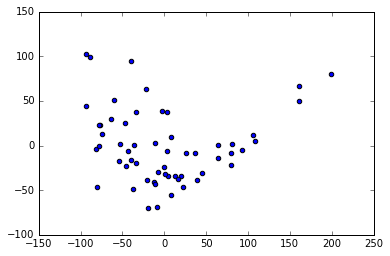

In [174]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print(dat.shape)
pca = PCA(n_components=2)
X_r = pca.fit(dat).transform(dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x, y = zip(*X_r)
plt.scatter(x, y)

## Plot colonization rates

/Volumes/WorkDrive/gimmeSAD/simout/K_10000-C_0.1/pi_x_dxy.log
/Volumes/WorkDrive/gimmeSAD/simout/K_10000-C_0.01/pi_x_dxy.log
/Volumes/WorkDrive/gimmeSAD/simout/K_10000-C_0.001/pi_x_dxy.log
[15, 100, 572]
(687, 100)
explained variance ratio (first two components): [ 0.86623127  0.08679845]
doing 0.1 - red
doing 0.01 - blue
doing 0.001 - yellow


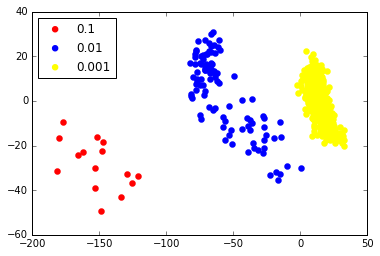

In [214]:
os.chdir(SIMOUT_DIR)
K = [10000, 5000, 1000]
C = [0.1, 0.01, 0.001]
multi_col = ["", "_x4", "_x10"]

dat = []
lens = []
for c in C:
    datfile = os.path.join(SIMOUT_DIR, "K_10000-C_{}/pi_x_dxy.log".format(c))
    print(datfile)
    mydat = load_pidxy(datfile)
    dat.extend(mydat)
    lens.append(len(mydat))
print(lens)
dat = np.array(dat)
print(dat.shape)

pca = PCA(n_components=2)
X_r = pca.fit(dat).transform(dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x,y = zip(*X_r)
cur = 0
for col, idx, size in zip(["red", "blue", "yellow"], lens, C):
    print("doing {} - {}".format(size, col))
    plt.scatter(x[cur:idx+cur], y[cur:idx+cur], color=col, label=size, lw=2)
    cur+=idx
plt.legend(loc='upper left', scatterpoints=1)
plt.show()

## Plot local community sizes

/Volumes/WorkDrive/gimmeSAD/simout/K_10000-C_0.01/pi_x_dxy.log
/Volumes/WorkDrive/gimmeSAD/simout/K_5000-C_0.01/pi_x_dxy.log
/Volumes/WorkDrive/gimmeSAD/simout/K_1000-C_0.01/pi_x_dxy.log
[100, 46, 2]
(148, 100)
explained variance ratio (first two components): [ 0.7633547   0.11368971]
doing 10000 - red
doing 5000 - blue
doing 1000 - yellow


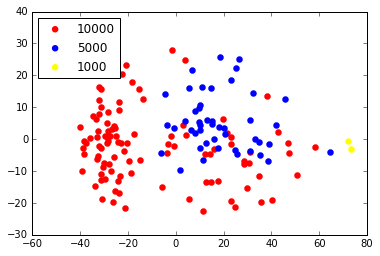

In [219]:
os.chdir(SIMOUT_DIR)
K = [10000, 5000, 1000]
C = [0.1, 0.01, 0.001]
multi_col = ["", "_x4", "_x10"]

dat = []
lens = []
for k in K:
    datfile = os.path.join(SIMOUT_DIR, "K_{}-C_0.01/pi_x_dxy.log".format(k))
    print(datfile)
    mydat = load_pidxy(datfile)
    dat.extend(mydat)
    lens.append(len(mydat))
print(lens)
dat = np.array(dat)
print(dat.shape)

pca = PCA(n_components=2)
X_r = pca.fit(dat).transform(dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x,y = zip(*X_r)
cur = 0
for col, idx, size in zip(["red", "blue", "yellow"], lens, K):
    print("doing {} - {}".format(size, col))
    plt.scatter(x[cur:idx+cur], y[cur:idx+cur], color=col, label=size, lw=2)
    cur+=idx
plt.legend(loc='upper left', scatterpoints=1)
plt.show()

In [68]:
import subprocess
NSIMS = 100000
c = 0.001
k = 5000
cursim_dir = "wat"
cmd = "./gimmeSAD.py -n "+ str(NSIMS)\
                            + " -c " + str(c)\
                            + " -k " + str(k)\
                            + " -o " + cursim_dir\
                            + " --model=2 "\
                            + " -f -q "
print(cmd)
FNULL = open(os.devnull, 'w')
proc = subprocess.Popen(cmd.split(), shell=False, stdout=FNULL, stderr=subprocess.STDOUT)

./gimmeSAD.py -n 100000 -c 0.001 -k 5000 -o wat --model=2  -f -q 


In [65]:
proc.communicate()

(None, None)